# Functional API
In this module, we will explore Keras's another model building API called functional API.
Here is the documentation: https://keras.io/getting-started/functional-api-guide/

In `Sequential`, you build a model by adding a layer to the `model` object:

```python
model = Sequential()
model.add(Conv2D(32, 3, input_shape=(32,32,3), activation='relu))
model.add(Cond2D(32, 3))
model.add(Activation('relu'))
...
```
However, in functional API, you pass the featuremap as an input to the layer:   

```python
inputs = Input(shape=(32,32,3))
conv1 = Conv2D(32,3, activation='relu')(inputs)
conv2 = Conv2D(32,3)(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = Activation('relu')(conv2)
...
model = Model(inputs=inputs, outputs=outputs)
```
You may have noticed that the functional API model needs a separate layer for input and output. Input() creates the the input tensor. Model() actually makes a model object from the output tensor. 

An advantage of functional API over Sequential is its flexibility. You can build a model architecture that has parallel paths or merging layers.

```python
...
conv1 = Conv2D(32,3,activation='relu')(conv0)
conv2 = Conv2D(32,5,activation='relu')(conv0)
...
```
Above example shows that the feature map from conv0 is split into two paths and are passed to conv1, and conv2   
```
         ____ conv1 (3x3)
        /     
conv0---     
        \____ conv2 (5x5)
```         

# Make an inception module from scratch
In the following exercise, you will make an inception module.
You'll need some info from [this paper](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwiC3sb8krbaAhWK5oMKHUroAlYQFggpMAA&url=https%3A%2F%2Farxiv.org%2Fpdf%2F1409.4842&usg=AOvVaw3v1ON5KCX99lZhuMLtNROq) to complete following.

In [12]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
concat = Concatenate(axis=1)

K.set_image_dim_ordering( 'tf' )

# fix random seed for reproducibility
seed = 123
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype( 'float32' )
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(y_test.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 3s 0us/step
(10000, 10)


In [0]:
## YOUR TURN
## make an inception module as shown in the paper Fig 2(a), the naive version 
## each conv takes 32 filters, and has same padding, relu activation
## Hint: use the Concatenate as in the import layers above
## Hint: MaxPoolng2D needs 1x1 strides and same padding to match the spatial 
# dimension
# Inception model at https://keras.io/getting-started/functional-api-guide/

def inception1(x, n = 32):
    input_img = Input(shape=(28, 28, 1))
    tower_1 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
    tower_2 = (Conv2D(n, (3, 3),padding='same', activation='relu'))(input_img)
    tower_3 = (Conv2D(n, (5, 5),padding='same', activation='relu'))(input_img)    
    tower_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(input_img)
    tower_4 = Conv2D(n, (1, 1), padding='same', activation='relu')(tower_4)
    c = concat([tower_1, tower_2, tower_3, tower_4])
    return c

In [0]:
## YOUR TURN
## make an inception module as shown in the paper Fig 2(b), which has 1x1 
#conv layers 
## each conv takes 32 filters, and has same padding
def inception2(x, n = 32):
    input_img = Input(shape=(28, 28, 1))
    
    tower_1 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
    
    tower_2 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
    tower_2 = Conv2D(n, (3, 3),padding='same', activation='relu')(tower_2)
    
    tower_3 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
    tower_3 = Conv2D(n, (5, 5),padding='same', activation='relu')(tower_3)
    
    tower_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(input_img)
    tower_4 = Conv2D(n, (1, 1), padding='same', activation='relu')(tower_4)
    
    c = concat([tower_1, tower_2, tower_3, tower_4])
    return c 

In [7]:
## YOUR TURN
## Now, build a model that has this structure:
## input-inception1-maxpool(2x2)-inception1-maxpool(2x2)-dense(128)-output
## print out the model summary
## Hint: input layer needs Input() as imported above
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten
from keras.models import Model
concat = Concatenate(axis=1)
concatB = Concatenate(axis=1)
n=32

input_img = Input(shape=(28, 28, 1))

tower_1 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = (Conv2D(n, (3, 3),padding='same', activation='relu'))(input_img)
tower_3 = (Conv2D(n, (5, 5),padding='same', activation='relu'))(input_img)    
tower_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(input_img)
tower_4 = Conv2D(n, (1, 1), padding='same', activation='relu')(tower_4)
c = concat([tower_1, tower_2, tower_3, tower_4])

c = (MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))(c)

c = tower_1 = Conv2D(n, (1, 1), padding='same', activation='relu')(c)
tower_2 = (Conv2D(n, (3, 3),padding='same', activation='relu'))(c)
tower_3 = (Conv2D(n, (5, 5),padding='same', activation='relu'))(c)    
tower_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(c)
tower_4 = Conv2D(n, (1, 1), padding='same', activation='relu')(tower_4)

c2 = concatB([tower_1, tower_2, tower_3, tower_4])

c2 = (MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))(c2)
c2 = Flatten()(c2)
c2 = Dense(128, activation='relu')(c2)
output = Dense(10, activation='softmax')(c2)

model1 =  Model(input_img, output)

model1.summary()
#Error with concatinate "multiple axis", redefined to concat at top of code
#Error " A `Concatenate` layer requires inputs with matching shapes except for the concat axis. 
###Got inputs shapes: [(None, 28, 28, 32), (None, 28, 28, 32), (None, 28, 28, 32), (None, 26, 26, 1)]"
####Added a 1x1 convultion layer 
#Error: 'Tensor' object is not callable

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 28, 28, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (

In [8]:
## YOUR TURN
## Now, build a model that has this structure:
## input-inception2-maxpool(2x2)-inception2-maxpool(2x2)-dense(128)-output
## name the model variable as model1
## print out the model summary
## Hint: input layer needs Input() as imported above
concat = Concatenate(axis=1)
concatB = Concatenate(axis=1)
n=32

input_img = Input(shape=(28, 28, 1))

tower_1 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
  
tower_2 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(n, (3, 3),padding='same', activation='relu')(tower_2)
    
tower_3 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
tower_3 = Conv2D(n, (5, 5),padding='same', activation='relu')(tower_3)
    
tower_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(input_img)
tower_4 = Conv2D(n, (1, 1), padding='same', activation='relu')(tower_4)
    
c = concat([tower_1, tower_2, tower_3, tower_4])

c = (MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))(c)

tower_1 = Conv2D(n, (1, 1), padding='same', activation='relu')(c)
  
tower_2 = Conv2D(n, (1, 1), padding='same', activation='relu')(c)
tower_2 = Conv2D(n, (3, 3),padding='same', activation='relu')(tower_2)
    
tower_3 = Conv2D(n, (1, 1), padding='same', activation='relu')(c)
tower_3 = Conv2D(n, (5, 5),padding='same', activation='relu')(tower_3)
    
tower_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(c)
tower_4 = Conv2D(n, (1, 1), padding='same', activation='relu')(tower_4)
    
c2 = concatB([tower_1, tower_2, tower_3, tower_4])

c2 = (MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))(c2)
c2 = Flatten()(c2)
c2 = Dense(128, activation='relu')(c2)
output = Dense(10, activation='softmax')(c2)

model2 =  Model(input_img, output)
model2.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 28, 28, 32)   64          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 28, 28, 32)   64          input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 28, 28, 1)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (

### Q1.
What is the number of parameters from model1() 
- 51,419,914
    
What is the number of parameters from model2()  
- 51,455,882
   
Explain why and which model is more efficient. 
# Model 1 is more efficent, it has less parameters and will therefore take less time to train.
   

### Q2. 
Add Adam optimizer with lr=0.001. Train for 50 epochs.
Compare the error rate for two models.

# Both models have similar error rates! 

In [0]:
## YOUR TURN (model1)
import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
from keras.optimizers import Adam
from keras.callbacks import History


history = History()
model= model1
adam = Adam(lr=0.001)
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])


In [33]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          callbacks=[history], nb_epoch=50, batch_size=200, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 108s - loss: 0.0497 - acc: 0.9845 - val_loss: 0.0387 - val_acc: 0.9880
Epoch 2/50
 - 107s - loss: 0.0266 - acc: 0.9916 - val_loss: 0.0271 - val_acc: 0.9909
Epoch 3/50
 - 107s - loss: 0.0172 - acc: 0.9946 - val_loss: 0.0266 - val_acc: 0.9914
Epoch 4/50
 - 107s - loss: 0.0115 - acc: 0.9962 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 5/50
 - 107s - loss: 0.0069 - acc: 0.9979 - val_loss: 0.0331 - val_acc: 0.9902
Epoch 6/50
 - 107s - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0468 - val_acc: 0.9897
Epoch 7/50
 - 107s - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0362 - val_acc: 0.9910
Epoch 8/50
 - 107s - loss: 0.0038 - acc: 0.9988 - val_loss: 0.0376 - val_acc: 0.9912
Epoch 9/50
 - 107s - loss: 0.0036 - acc: 0.9990 - val_loss: 0.0393 - val_acc: 0.9916
Epoch 10/50
 - 107s - loss: 0.0071 - acc: 0.9976 - val_loss: 0.0404 - val_acc: 0.9910
Epoch 11/50
 - 107s - loss: 0.0049 - acc: 0.9985 - val_loss: 0.0440 - val_acc: 0.9912
Epoch 12/50
 

 - 106s - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0591 - val_acc: 0.9913
Epoch 35/50
 - 107s - loss: 4.9196e-04 - acc: 0.9999 - val_loss: 0.0539 - val_acc: 0.9919
Epoch 36/50
 - 107s - loss: 0.0031 - acc: 0.9992 - val_loss: 0.0705 - val_acc: 0.9899
Epoch 37/50
 - 106s - loss: 0.0060 - acc: 0.9986 - val_loss: 0.0570 - val_acc: 0.9919
Epoch 38/50
 - 106s - loss: 0.0012 - acc: 0.9997 - val_loss: 0.0666 - val_acc: 0.9914
Epoch 39/50
 - 106s - loss: 9.5449e-04 - acc: 0.9998 - val_loss: 0.0526 - val_acc: 0.9930
Epoch 40/50
 - 106s - loss: 6.3529e-04 - acc: 0.9999 - val_loss: 0.0549 - val_acc: 0.9930
Epoch 41/50
 - 106s - loss: 0.0015 - acc: 0.9997 - val_loss: 0.0572 - val_acc: 0.9920
Epoch 42/50
 - 106s - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0587 - val_acc: 0.9912
Epoch 43/50
 - 106s - loss: 0.0054 - acc: 0.9987 - val_loss: 0.0507 - val_acc: 0.9917
Epoch 44/50
 - 107s - loss: 0.0028 - acc: 0.9993 - val_loss: 0.0630 - val_acc: 0.9912
Epoch 45/50
 - 106s - loss: 0.0016 - acc: 0.9996 - val

In [11]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("model1 Error: %.2f%%" % (100-scores[1]*100))

model1 Error: 0.95%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


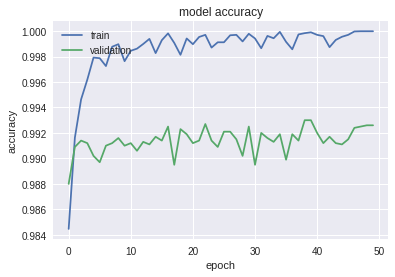

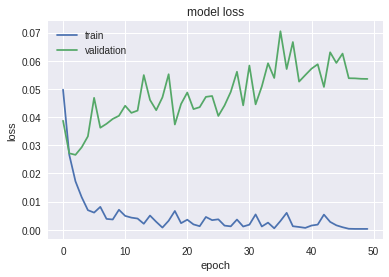

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
print("model1 Error: %.2f%%" % (100-scores[1]*100)) 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [0]:
## YOUR TURN (model2)
history = History()
model= model2
adam = Adam(lr=0.001)
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])


In [36]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          callbacks=[history], nb_epoch=50, batch_size=200, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 124s - loss: 0.1774 - acc: 0.9474 - val_loss: 0.0461 - val_acc: 0.9846
Epoch 2/50
 - 123s - loss: 0.0361 - acc: 0.9883 - val_loss: 0.0286 - val_acc: 0.9910
Epoch 3/50
 - 122s - loss: 0.0222 - acc: 0.9931 - val_loss: 0.0297 - val_acc: 0.9906
Epoch 4/50
 - 123s - loss: 0.0135 - acc: 0.9958 - val_loss: 0.0336 - val_acc: 0.9904
Epoch 5/50
 - 122s - loss: 0.0116 - acc: 0.9962 - val_loss: 0.0313 - val_acc: 0.9900
Epoch 6/50
 - 122s - loss: 0.0085 - acc: 0.9974 - val_loss: 0.0381 - val_acc: 0.9907
Epoch 7/50
 - 122s - loss: 0.0070 - acc: 0.9975 - val_loss: 0.0338 - val_acc: 0.9918
Epoch 8/50
 - 122s - loss: 0.0057 - acc: 0.9981 - val_loss: 0.0347 - val_acc: 0.9913
Epoch 9/50
 - 122s - loss: 0.0056 - acc: 0.9981 - val_loss: 0.0434 - val_acc: 0.9904
Epoch 10/50
 - 122s - loss: 0.0066 - acc: 0.9979 - val_loss: 0.0446 - val_acc: 0.9899
Epoch 11/50
 - 122s - loss: 0.0048 - acc: 0.9986 - val_loss: 0.0361 - val_acc: 0.9919
Epoch 12/50
 

 - 122s - loss: 2.7190e-04 - acc: 1.0000 - val_loss: 0.0422 - val_acc: 0.9925
Epoch 35/50
 - 122s - loss: 2.7091e-04 - acc: 1.0000 - val_loss: 0.0424 - val_acc: 0.9925
Epoch 36/50
 - 122s - loss: 2.7043e-04 - acc: 1.0000 - val_loss: 0.0426 - val_acc: 0.9925
Epoch 37/50
 - 122s - loss: 2.7009e-04 - acc: 1.0000 - val_loss: 0.0429 - val_acc: 0.9925
Epoch 38/50
 - 122s - loss: 2.6984e-04 - acc: 1.0000 - val_loss: 0.0432 - val_acc: 0.9927
Epoch 39/50
 - 122s - loss: 2.6964e-04 - acc: 1.0000 - val_loss: 0.0434 - val_acc: 0.9927
Epoch 40/50
 - 122s - loss: 2.6949e-04 - acc: 1.0000 - val_loss: 0.0437 - val_acc: 0.9926
Epoch 41/50
 - 122s - loss: 2.6937e-04 - acc: 1.0000 - val_loss: 0.0439 - val_acc: 0.9927
Epoch 42/50
 - 122s - loss: 2.6927e-04 - acc: 1.0000 - val_loss: 0.0442 - val_acc: 0.9927
Epoch 43/50
 - 122s - loss: 2.6919e-04 - acc: 1.0000 - val_loss: 0.0445 - val_acc: 0.9928
Epoch 44/50
 - 122s - loss: 2.6912e-04 - acc: 1.0000 - val_loss: 0.0447 - val_acc: 0.9928
Epoch 45/50
 - 122s - 

In [17]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("model2 Error: %.2f%%" % (100-scores[1]*100))

model2 Error: 0.94%


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


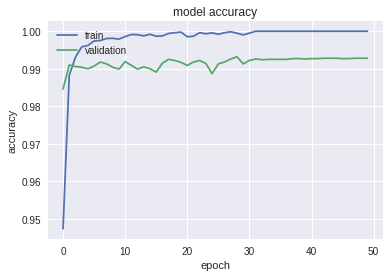

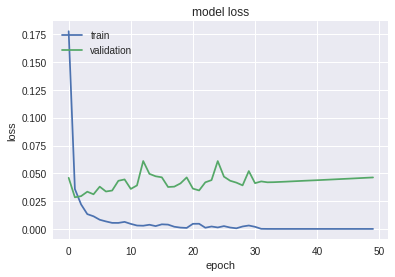

In [37]:
%matplotlib inline
print("model2 Error: %.2f%%" % (100-scores[1]*100)) 
print(history.history.keys())    
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Q3. 
Apply BatchNorm after every conv or dense layers for the inception module 2. 
Compare the performances.
# - The new model with batchnorm quickly overfits to 100% accuracy after only 18 epochs. It also takes 145 sec per epoch (2 hours total) compared to the 122 sec for the previous model.

In [0]:
import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization as Batchnorm
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import History

In [0]:
def inception2BN(x, n = 32):
tower_1 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Batchnorm()(tower_1)
  
tower_2 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(n, (3, 3),padding='same', activation='relu')(tower_2)
tower_2 = Batchnorm()(tower_2)
    
tower_3 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
tower_3 = Conv2D(n, (5, 5),padding='same', activation='relu')(tower_3)
tower_3 = Batchnorm()(tower_3)
    
tower_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(input_img)
tower_4 = Conv2D(n, (1, 1), padding='same', activation='relu')(tower_4)
tower_4 = Batchnorm()(tower_4)
    
c = concat([tower_1, tower_2, tower_3, tower_4])
    return c

In [0]:

concat = Concatenate(axis=1)
concatB = Concatenate(axis=1)
n=32

input_img = Input(shape=(28, 28, 1))

tower_1 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Batchnorm()(tower_1)
  
tower_2 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(n, (3, 3),padding='same', activation='relu')(tower_2)
tower_2 = Batchnorm()(tower_2)
    
tower_3 = Conv2D(n, (1, 1), padding='same', activation='relu')(input_img)
tower_3 = Conv2D(n, (5, 5),padding='same', activation='relu')(tower_3)
tower_3 = Batchnorm()(tower_3)
    
tower_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(input_img)
tower_4 = Conv2D(n, (1, 1), padding='same', activation='relu')(tower_4)
tower_4 = Batchnorm()(tower_4)
    
c = concat([tower_1, tower_2, tower_3, tower_4])

c = (MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))(c)

tower_1 = Conv2D(n, (1, 1), padding='same', activation='relu')(c)
tower_1 = Batchnorm()(tower_1)

tower_2 = Conv2D(n, (1, 1), padding='same', activation='relu')(c)
tower_2 = Conv2D(n, (3, 3),padding='same', activation='relu')(tower_2)
tower_2 = Batchnorm()(tower_2)
    
tower_3 = Conv2D(n, (1, 1), padding='same', activation='relu')(c)
tower_3 = Conv2D(n, (5, 5),padding='same', activation='relu')(tower_3)
tower_3 = Batchnorm()(tower_3)
    
tower_4 = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(c)
tower_4 = Conv2D(n, (1, 1), padding='same', activation='relu')(tower_4)
tower_4 = Batchnorm()(tower_4)
    
c2 = concatB([tower_1, tower_2, tower_3, tower_4])

c2 = (MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'))(c2)
c2 = Flatten()(c2)
c2 = Dense(128, activation='relu')(c2)
c2 = Batchnorm()(c2)
output = Dense(10, activation='softmax')(c2)



In [7]:
model3 =  Model(input_img, output)
model3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 28, 28, 32)   64          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 28, 28, 32)   64          input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 28, 28, 1)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_14 

In [0]:
# Train and Evaluate (model3)
history = History()
model= model3
adam = Adam(lr=0.001)
model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy'])


In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          callbacks=[history], nb_epoch=50, batch_size=200, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
 - 150s - loss: 0.1376 - acc: 0.9604 - val_loss: 0.0509 - val_acc: 0.9845
Epoch 2/50
 - 145s - loss: 0.0311 - acc: 0.9911 - val_loss: 0.0360 - val_acc: 0.9889
Epoch 3/50
 - 145s - loss: 0.0177 - acc: 0.9952 - val_loss: 0.0404 - val_acc: 0.9874
Epoch 4/50
 - 145s - loss: 0.0106 - acc: 0.9972 - val_loss: 0.0431 - val_acc: 0.9862
Epoch 5/50
 - 145s - loss: 0.0092 - acc: 0.9975 - val_loss: 0.0422 - val_acc: 0.9874
Epoch 6/50
 - 145s - loss: 0.0054 - acc: 0.9986 - val_loss: 0.0261 - val_acc: 0.9924
Epoch 7/50
 - 145s - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0317 - val_acc: 0.9905
Epoch 8/50
 - 145s - loss: 0.0042 - acc: 0.9988 - val_loss: 0.0593 - val_acc: 0.9822
Epoch 9/50
 - 145s - loss: 0.0071 - acc: 0.9976 - val_loss: 0.1625 - val_acc: 0.9568
Epoch 10/50
 - 145s - loss: 0.0066 - acc: 0.9978 - val_loss: 0.0340 - val_acc: 0.9905
Epoch 11/50
 - 145s - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0216 - val_acc: 0.9935
Epoch 12/50
 

Epoch 34/50
 - 145s - loss: 4.8973e-06 - acc: 1.0000 - val_loss: 0.0278 - val_acc: 0.9939
Epoch 35/50
 - 145s - loss: 4.3926e-06 - acc: 1.0000 - val_loss: 0.0279 - val_acc: 0.9939
Epoch 36/50
 - 145s - loss: 3.5355e-06 - acc: 1.0000 - val_loss: 0.0280 - val_acc: 0.9939
Epoch 37/50
 - 145s - loss: 3.1768e-06 - acc: 1.0000 - val_loss: 0.0281 - val_acc: 0.9942
Epoch 38/50
 - 145s - loss: 2.7421e-06 - acc: 1.0000 - val_loss: 0.0287 - val_acc: 0.9939
Epoch 39/50
 - 145s - loss: 2.3297e-06 - acc: 1.0000 - val_loss: 0.0286 - val_acc: 0.9940
Epoch 40/50
 - 145s - loss: 2.0402e-06 - acc: 1.0000 - val_loss: 0.0290 - val_acc: 0.9940
Epoch 41/50
 - 145s - loss: 1.6851e-06 - acc: 1.0000 - val_loss: 0.0288 - val_acc: 0.9940
Epoch 42/50
 - 145s - loss: 1.4456e-06 - acc: 1.0000 - val_loss: 0.0290 - val_acc: 0.9941
Epoch 43/50
 - 145s - loss: 1.3155e-06 - acc: 1.0000 - val_loss: 0.0288 - val_acc: 0.9941
Epoch 44/50
 - 145s - loss: 1.1278e-06 - acc: 1.0000 - val_loss: 0.0298 - val_acc: 0.9941
Epoch 45/5